In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'datafiles/raw_pulses/feb_5_run_1_pulse_1.csv'

In [9]:
SM_P_NS = 0.5
dt = 1/SM_P_NS
trig_level = 60

# Open DataFrame

In [10]:
df = pd.read_csv(path, sep=',', index_col=0).astype(float)
df['Energy']= df['Voltage'].cumsum()/dt

Find the trigger time.

In [19]:
i = np.argmax(df['Voltage']>trig_level)
time_peak = df.index.values[i]/1000

# Do Plots

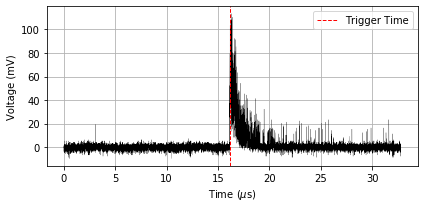

In [20]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(df.index/1000, df['Voltage'], lw=0.2, color='k')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Voltage (mV)')
ax.grid()

ax.axvline(time_peak, color='r', ls='--', lw=1, label='Trigger Time')
ax.legend(loc='best')
#ax.set_title('Photomultiplier Signal During Collision Event')

fig.tight_layout()
plt.savefig('plots/report_plots/sample_pulse.png', dpi=300)
plt.show()

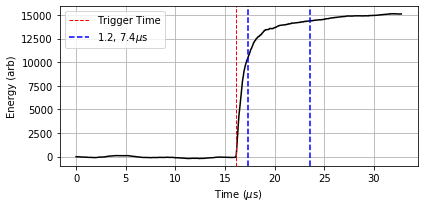

In [25]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(df.index/1000, df['Energy'], color='k')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Energy (arb)')
ax.grid()

ax.axvline(time_peak, color='r', ls='--', lw=1, label='Trigger Time')
ax.axvline(time_peak+1.2, color='blue', ls='--', label='1.2, 7.4$\mu$s')
ax.axvline(time_peak+7.4, color='blue', ls='--')

#ax.set_title('Integral of Photomultiplier Signal')
ax.legend(loc='best')

fig.tight_layout()
plt.savefig('plots/report_plots/sample_pulse_integral.png', dpi=300)
plt.show()